In [ ]:
# Proszę pobrać plik treatment.txt, zawierający wyniki analizy nowego leku.
# W dwóch pierwszych kolumnach znajduje się stężenie dwóch składników w próbce krwi, w trzeciej 
# - informacja o tym, czy lek zadziałał. Dane nie są znormalizowane. Proszę znormalizować dane, 
# podzielić je na zbiór uczący i testujący w proporcjach 80-20 (należy pamiętać o proporcjach klas),
# zaproponować wielowarstwową sieć neuronową i zbadać jej skuteczność dla różnych ilości warstw i 
# neuronów w tych warstwach. Proszę narysować jak sieć dokonała podziału w zbiorze dla kilku sieci
# (zarówno tych z dobrymi, jak i złymi wynikami) i jak wygląda poprawny podział zbioru. 
# Proszę przedstawić wyniki dla 5-8 różnych struktur sieci.

import numpy as np

with open('treatment.txt') as f:
    lines = (line for line in f if not line.startswith('#'))
    data = np.loadtxt(lines, delimiter=',', skiprows=1)
    
data = np.array(data)
    
# print(data)


In [ ]:
from sklearn.preprocessing import normalize


x = np.array(normalize(data[:,:2], axis = 0))
y = data[:,-1]
print(x, y)


[[0.02381069 0.02827469]
 [0.04945297 0.0383145 ]
 [0.         0.04163129]
 ...
 [0.00610531 0.06421329]
 [0.06776889 0.05764936]
 [0.07692685 0.03712203]] [0. 0. 1. ... 0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.2)

print(x_train)

[[0.01587379 0.00412543]
 [0.03052653 0.03319481]
 [0.01526326 0.03771328]
 ...
 [0.         0.01379511]
 [0.0360213  0.01991013]
 [0.03907395 0.00890012]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

model = MLPClassifier(hidden_layer_sizes=(100, 200, 300, 200), max_iter = 1000, tol = 0.001)
model.fit(x_train,y_train)
print('score train:', model.score(x_train,y_train))
print('score test:', model.score(x_test,y_test))



score train: 0.8984293193717278
score test: 0.895397489539749


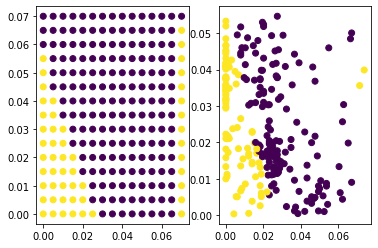

In [ ]:
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(0, 0.07, 0.005), np.arange(0, 0.07, 0.005))
test_points = np.transpose(np.vstack((np.ravel(xx),np.ravel(yy))))

prediction = model.predict(test_points)
plt.subplot(1, 2, 1)
plt.scatter(test_points[:,0], test_points[:,1], c=prediction)
# plt.show()

prediction = model.predict(x_test)
plt.subplot(1, 2, 2)
plt.scatter(x_test[:,0], x_test[:,1], c=prediction)

plt.show()

In [ ]:
# Proszę pobrać zbiór ręcznie pisanych cyfr z 
# https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits 
# (można to zrobić funkcją datasets.load_digits( ) w sklearnie). Proszę sprawdzić skuteczność 
# klasyfikacji na tym zbiorze za pomocą wielowarstwowej sieci neuronowej.

from sklearn.datasets import load_digits

digits = load_digits()
x = digits.data
y = digits.target

x_norm = np.array(normalize(x, axis = 0))
y_norm = normalize([y])

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.2)

network = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5), max_iter = 1000, tol = 0.001, activation = 'identity', learning_rate="adaptive")
network.fit(x_train,y_train)

predicted_labels = network.predict(x_train)
matrix = confusion_matrix(y_train, predicted_labels)


print(matrix)
print(network.score(x_train,y_train))

[[140   0   0   0   1   1   0   0   0   0]
 [  0 139   0   1   1   0   1   0   3   1]
 [  0   1 140   1   0   0   0   0   0   0]
 [  0   0   1 141   0   0   0   0   1   3]
 [  1   1   0   0 141   0   1   0   1   0]
 [  1   1   0   0   0 140   0   0   2   1]
 [  0   1   0   0   0   1 142   0   1   0]
 [  0   0   0   0   0   1   0 141   0   1]
 [  0   6   0   0   0   1   0   0 132   0]
 [  0   0   0   3   0   1   0   1   0 139]]
0.9707724425887265


In [ ]:
predicted_labels_test = network.predict(x_test)
matrix_test = confusion_matrix(y_test,predicted_labels_test)

print(matrix_test)
print(network.score(x_test,y_test))

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  1  0  0  0  0  2  3]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 1  0  2 34  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 2  0  0  0  0 32  0  0  0  3]
 [ 0  0  0  0  0  2 34  0  0  0]
 [ 0  0  0  0  1  1  0 33  0  1]
 [ 0  1  1  1  0  0  0  0 32  0]
 [ 0  0  0  2  0  0  0  0  2 32]]
0.925


In [ ]:
# Proszę sprawdzić, jak zmieni się poprawność klasyfikacji na zbiorze ręcznie pisanych cyfr dla różnych architektur sieci,
# funkcji aktywacji, ilości epok uczenia i algorytmów uczenia. Proszę zbadać wpływ współczynnika uczenia (learning_rate)
# podczas używania algorytmu SGD. Dla najciekawszych przykładów proszę wypisać macierze pomyłek.


network2 = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5), max_iter = 1000, tol = 0.001, activation = 'relu', learning_rate="adaptive")
network2.fit(x_train,y_train)

# predicted_labels = network2.predict(x_train)
# matrix = confusion_matrix(y_train, predicted_labels)

# print(matrix)
# print(network2.score(x_train,y_train))

predicted_labels = network2.predict(x_test)
matrix = confusion_matrix(y_test, predicted_labels)

print(matrix)
print(network2.score(x_test,y_test))


[[35  0  0  0  0  1  0  0  0  0]
 [ 1 25  0  0  0  0  1  0  4  5]
 [ 0  0 33  0  0  0  2  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  4]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 1  1  0  1  0 34  0  0  0  0]
 [ 1  0  1  0  0  0 34  0  0  0]
 [ 0  0  2  0  0  0  0 31  3  0]
 [ 0  2  0  0  1  0  0  4 26  2]
 [ 0  3  0  2  0  0  0  0  3 28]]
0.8722222222222222


In [ ]:
network3 = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5), max_iter = 1000, tol = 0.001, activation = 'logistic', learning_rate="adaptive")
network3.fit(x_train,y_train)

# predicted_labels = network3.predict(x_train)
# matrix = confusion_matrix(y_train, predicted_labels)

# print(matrix)
# print(network3.score(x_train,y_train))

predicted_labels = network3.predict(x_test)
matrix = confusion_matrix(y_test, predicted_labels)

print(matrix)
print(network3.score(x_test,y_test))


[[35  0  1  0  0  0  0  0  0  0]
 [29  0  7  0  0  0  0  0  0  0]
 [35  0  0  0  0  0  0  0  0  0]
 [30  0  7  0  0  0  0  0  0  0]
 [31  0  5  0  0  0  0  0  0  0]
 [25  0 12  0  0  0  0  0  0  0]
 [35  0  1  0  0  0  0  0  0  0]
 [34  0  2  0  0  0  0  0  0  0]
 [32  0  3  0  0  0  0  0  0  0]
 [ 7  0 29  0  0  0  0  0  0  0]]
0.09722222222222222


In [ ]:
network4 = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5), max_iter = 1000, tol = 0.001, activation = 'tanh', learning_rate="adaptive")
network4.fit(x_train,y_train)

# predicted_labels = network4.predict(x_train)
# matrix = confusion_matrix(y_train, predicted_labels)

# print(matrix)
# print(network4.score(x_train,y_train))

predicted_labels = network4.predict(x_test)
matrix = confusion_matrix(y_test, predicted_labels)

print(matrix)
print(network4.score(x_test,y_test))

[[35  0  0  0  0  1  0  0  0  0]
 [ 0 28  0  1  1  0  0  0  2  4]
 [ 0  0 34  0  0  0  1  0  0  0]
 [ 0  2  0 30  0  0  0  0  2  3]
 [ 0  0  0  0 35  0  0  0  1  0]
 [ 1  0  0  1  3 31  0  0  0  1]
 [ 0  1  0  0  0  1 33  0  1  0]
 [ 0  0  0  0  1  0  0 34  0  1]
 [ 0  3  0  1  2  0  1  0 27  1]
 [ 0  1  0  1  2  0  0  0  4 28]]
0.875


In [ ]:
network5 = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5), max_iter = 1000, tol = 0.001, activation = 'identity', learning_rate="constant")
network5.fit(x_train,y_train)

predicted_labels = network5.predict(x_test)
matrix = confusion_matrix(y_test, predicted_labels)

print("constant")
print(matrix)
# print(network5.score(x_test,y_test))

network5 = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5), max_iter = 1000, tol = 0.001, activation = 'identity', learning_rate="invscaling")
network5.fit(x_train,y_train)

predicted_labels = network5.predict(x_test)
matrix = confusion_matrix(y_test, predicted_labels)

print("invscaling")
print(matrix)
# print(network5.score(x_test,y_test))

network5 = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5), max_iter = 1000, tol = 0.001, activation = 'identity', learning_rate="adaptive")
network5.fit(x_train,y_train)

predicted_labels = network5.predict(x_test)
matrix = confusion_matrix(y_test, predicted_labels)

print("adaptive")
print(matrix)
# print(network5.score(x_test,y_test))

constant
[[35  0  0  0  0  1  0  0  0  0]
 [ 0 27  1  0  0  0  1  0  1  6]
 [ 0  1 32  2  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  1  1  0 33  0  0  1  1]
 [ 1  0  0  0  2  0 33  0  0  0]
 [ 3  0  0  0  1  0  0 31  0  1]
 [ 0  1  0  1  0  4  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  3 32]]
invscaling
[[31  0  0  0  4  0  0  1  0  0]
 [ 0 20  7  0  0  3  0  2  3  1]
 [ 0  2 28  0  1  1  0  0  1  2]
 [ 0  3  8  1  0  1  0  5  6 13]
 [ 4  1  0  0 17  0  0  8  6  0]
 [ 6  2  8  5  1  0  1 11  1  2]
 [ 1  0 11  0  1  7 13  2  0  1]
 [ 1  0  4  2  7  0  0 20  2  0]
 [ 1 15  3  0  0  0  0  6  7  3]
 [ 3  6  0  0  3  1  0  6 11  6]]
adaptive
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 29  0  0  1  0  0  0  3  3]
 [ 0  1 33  1  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  1  0  0 33  0  1  0  2]
 [ 1  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  2  0  0 33  0  1]
 [ 0  2  0  1  0  0  0  1 30  1]
 [ 0  0  0  

In [ ]:
network6 = MLPClassifier(solver='sgd',hidden_layer_sizes=(1 ), max_iter = 1000, tol = 0.001, activation = 'identity', learning_rate="adaptive")
network6.fit(x_train,y_train)

predicted_labels = network.predict(x_test)
matrix = confusion_matrix(y_test, predicted_labels)


print(matrix)
print(network.score(x_test,y_test))

[[36  0  0  0  0  0  0  0  0  0]
 [ 1 30  1  1  0  0  0  0  0  3]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  1  0  1  1  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  1  0  0 34  0  0  0  2]
 [ 2  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  3  0  0 31  0  2]
 [ 0  0  0  0  0  1  0  0 34  0]
 [ 0  0  0  1  0  0  0  0  1 34]]
0.9361111111111111


In [ ]:
# Proszę pobrać zbiór yeast z UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Yeast). 
# Proszę we własnym zakresie dokonać wstępnej analizy i przygotowania tego zbioru (uwaga, wymagana jest zamiana 
# etykiet tekstowych w ostatniej kolumnie na liczbowe - można je zamienić ręcznie albo przy użyciu takich narzędzi 
# jak https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html, 
# proszę jednak pamiętać, że nie musi on ułożyć tych etykiet po kolei). Proszę pamiętać, 
# że liczności różnych klas wewnątrz zbioru są _bardzo_ nierówne. Proszę spróbować osiągnąć jak 
# najlepsze wyniki i narysować dla nich macierz pomyłek (dla zbioru uczącego i testującego). 
# Czy trafność na poziomie 0.5 dla takiego zbioru jest dobra? Mogą państwo zbadać też czas wykonywania 
# funkcji fit dla różnych konfiguracji sieci.

    
x = np.loadtxt('yeast.data', usecols=(1, 2, 3, 4, 5, 6, 7, 8))
y_text = np.loadtxt('yeast.data', usecols=(9), dtype=str)

# print(x)
# print(y_text)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(["CYT", "NUC", "MIT", "ME3", "ME2", "ME1", "EXC", "VAC", "POX", "ERL"])
y = le.transform(y_text)

print(y)

# le.transform(["CYT", "CYT", "NUC"])
# array([0, 0, 6])

# list(le.inverse_transform([0, 0, 6]))
# ['CYT', 'CYT', 'NUC']

[6 6 6 ... 4 7 0]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.2)

network = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20, 50, 20), max_iter = 1000, tol = 0.001, activation = 'relu')
network.fit(x_train,y_train)

print('score train:', network.score(x_train,y_train))
predicted_labels = network.predict(x_train)
matrix = confusion_matrix(y_train, predicted_labels)
print(matrix)

print('score train:', network.score(x_test,y_test))
predicted_labels = network.predict(x_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(matrix)


# print(network.score(x_train,y_train))

score train: 0.7093513058129739
[[269   0   1   0   1   7  17  74   0   1]
 [  0   4   0   0   0   0   0   0   0   0]
 [  3   0  18   2   1   0   2   2   0   0]
 [  0   0   1  33   1   0   0   0   0   0]
 [  3   0   3   2  23   4   2   4   0   0]
 [  7   0   0   0   1 116   0   7   0   0]
 [ 36   0   0   1   5   3 126  23   0   1]
 [ 83   0   0   0   2   7  13 238   0   0]
 [  2   0   1   0   0   0   1   1  11   0]
 [  7   0   1   0   0   5   4   3   0   4]]
score train: 0.5824915824915825
[[64  0  0  0  0  1  5 23  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 0  0  5  2  0  0  0  0  0  0]
 [ 0  0  1  6  1  0  0  0  0  1]
 [ 1  0  0  2  4  3  0  0  0  0]
 [ 3  0  0  0  0 23  0  4  0  2]
 [ 7  0  1  0  2  4 24 11  0  0]
 [29  0  0  0  1  4  6 46  0  0]
 [ 2  0  0  1  1  0  0  0  0  0]
 [ 3  0  2  0  1  0  0  0  0  0]]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
